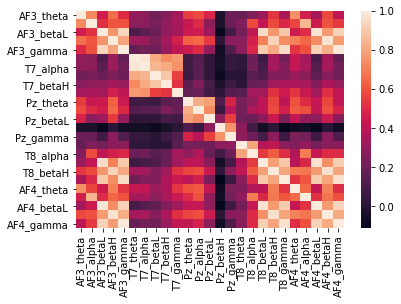

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from keras.layers import Dense
from keras.models import load_model
from keras import *
import numpy as np
from sklearn.utils import shuffle

%matplotlib inline

datas = pd.read_csv("21-02-2018_18-31-45.csv")
datas = datas.drop(["n", "time"], axis=1)
datas = (datas - datas.mean()) / datas.std()
corr = datas.corr()
sns.heatmap(corr)


dataset = pd.read_csv("data15min.csv")

X = Y = dataset.sample(frac=0.8)
X_test = Y_test = dataset.drop(X.index)
activation = 'linear'


In [67]:

from keras.models import Sequential
from keras.layers import Dense
import numpy

numpy.random.seed(7)

#dataset = numpy.loadtxt("data15min.csv", delimiter=",", skiprows=1, usecols=range(2,27))

#X = Y = dataset

dataset2 = pd.read_csv("louis.csv")
dataset = pd.read_csv("data15min.csv")
dataset = dataset[0:len(dataset2)]
dataset = pd.concat([dataset, dataset2])
dataset = dataset.drop(["n", "time"], axis=1)
dataset = shuffle(dataset)
X = Y = dataset.sample(frac=0.8)
X_test = Y_test = dataset.drop(X.index)
activation = 'linear'

X = Y = X.as_matrix()
X_test = Y_test = X_test.as_matrix()
activation = 'linear'

model = Sequential()
model.add(Dense(50	, activation="relu", input_dim=25))
model.add(Dense(15	, activation="linear"))
model.add(Dense(5	, activation=activation))
model.add(Dense(15	, activation="linear"))
model.add(Dense(50	, activation="relu"))
model.add(Dense(25	, activation=activation))
model.summary()
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['acc'])

# model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X, Y, epochs=300, batch_size=10,  validation_data=(X_test, Y_test))

scores = model.evaluate(X_test, Y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
model.save("model.h5")

model.save_weights('my_model_weights.h5')


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_335 (Dense)            (None, 50)                1300      
_________________________________________________________________
dense_336 (Dense)            (None, 15)                765       
_________________________________________________________________
dense_337 (Dense)            (None, 5)                 80        
_________________________________________________________________
dense_338 (Dense)            (None, 15)                90        
_________________________________________________________________
dense_339 (Dense)            (None, 50)                800       
_________________________________________________________________
dense_340 (Dense)            (None, 25)                1275      
Total params: 4,310
Trainable params: 4,310
Non-trainable params: 0
_________________________________________________________________
Train on

3886/3886 [==============================] - 1s 278us/step - loss: 77151.4898 - acc: 0.7656 - val_loss: 1699.8526 - val_acc: 0.7278
Epoch 106/300
3886/3886 [==============================] - 1s 246us/step - loss: 46428.4069 - acc: 0.7723 - val_loss: 1649.6161 - val_acc: 0.7111
Epoch 107/300
3886/3886 [==============================] - 1s 232us/step - loss: 3101.8482 - acc: 0.7735 - val_loss: 1868.7279 - val_acc: 0.7167
Epoch 108/300
3886/3886 [==============================] - 1s 231us/step - loss: 13418.8289 - acc: 0.7656 - val_loss: 1914.1063 - val_acc: 0.7167
Epoch 109/300
3886/3886 [==============================] - 1s 234us/step - loss: 12190.7036 - acc: 0.7607 - val_loss: 1728.0931 - val_acc: 0.7222
Epoch 110/300
3886/3886 [==============================] - 1s 240us/step - loss: 3918.6798 - acc: 0.7694 - val_loss: 1343.0292 - val_acc: 0.7389
Epoch 111/300
3886/3886 [==============================] - 1s 231us/step - loss: 50217.6959 - acc: 0.7630 - val_loss: 43919.1964 - val_acc: 

3886/3886 [==============================] - 1s 253us/step - loss: 14071.3319 - acc: 0.7774 - val_loss: 1566.1416 - val_acc: 0.7444
Epoch 218/300
3886/3886 [==============================] - 1s 256us/step - loss: 6017.5159 - acc: 0.7823 - val_loss: 1221.4769 - val_acc: 0.7444
Epoch 219/300
3886/3886 [==============================] - 1s 254us/step - loss: 26519.3363 - acc: 0.7854 - val_loss: 4397.5428 - val_acc: 0.7722
Epoch 220/300
3886/3886 [==============================] - 1s 255us/step - loss: 104148.6067 - acc: 0.7689 - val_loss: 12179.5411 - val_acc: 0.6611
Epoch 221/300
3886/3886 [==============================] - 1s 259us/step - loss: 203727.0269 - acc: 0.6897 - val_loss: 6208.4625 - val_acc: 0.6667
Epoch 222/300
3886/3886 [==============================] - 1s 247us/step - loss: 9444.3064 - acc: 0.7298 - val_loss: 2395.1280 - val_acc: 0.6778
Epoch 223/300
3886/3886 [==============================] - 1s 245us/step - loss: 8219.4971 - acc: 0.7545 - val_loss: 3244.9531 - val_acc:

In [21]:
from keras.models import Sequential
from keras.layers import Dense
from keras.models import load_model
from keras import *
import numpy as np

dataset = np.loadtxt("data15min.csv", delimiter=",", skiprows=1, usecols=range(2,27))

X = Y = dataset
model = load_model("model.h5")
model.layers.pop()
model.layers.pop()
model.layers.pop()

model.outputs = [model.layers[-1].output]
model.layers[-1].outbound_nodes = []
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

model.summary()

inp = model.input
out = model.layers[-1].output
model2 = Model(inp, out)
model2.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

model2.summary()

output = model2.predict(X)
#model2.save("model2.h5")
#np.savetxt("output.csv", output, delimiter=",")

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_103 (Dense)            (None, 170)               4420      
_________________________________________________________________
dense_104 (Dense)            (None, 140)               23940     
_________________________________________________________________
dense_105 (Dense)            (None, 5)                 705       
Total params: 29,065
Trainable params: 29,065
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_103_input (InputLayer) (None, 25)                0         
_________________________________________________________________
dense_103 (Dense)            (None, 170)               4420      
_________________________________________________________________
dense_

In [24]:
from keras.models import Sequential
from keras.layers import Dense
from keras.models import load_model
from keras import *
import numpy as np
model3 = load_model("model2.h5")
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19_input (InputLayer)  (None, 25)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 150)               3900      
_________________________________________________________________
dense_20 (Dense)             (None, 120)               18120     
_________________________________________________________________
dense_21 (Dense)             (None, 5)                 605       
Total params: 22,625
Trainable params: 22,625
Non-trainable params: 0
_________________________________________________________________


In [70]:
dataset = pd.read_csv("louis.csv")
dataset = dataset.drop(["n", "time"], axis=1)
X = Y = dataset

activation = 'linear'

X = Y = X.as_matrix()
activation = 'linear'


model = Sequential()
model.add(Dense(50	, activation="relu", input_dim=25))
model.add(Dense(15	, activation="linear"))
model.add(Dense(5	, activation=activation))
model.add(Dense(15	, activation="linear"))
model.add(Dense(50	, activation="relu"))
model.add(Dense(25	, activation=activation))
model.load_weights("my_model_weights.h5")
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

print(model.evaluate(X, Y))
model.layers.pop()
model.layers.pop()
model.layers.pop()

model.outputs = [model.layers[-1].output]

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model.summary()

output = model.predict(X)
print(X[0])
print(output[0])
model.save("model_correct.h5")


2429/2429 [==============================] - 1s 544us/step
[2719.532635229809, 0.6908192668936781]
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_353 (Dense)            (None, 50)                1300      
_________________________________________________________________
dense_354 (Dense)            (None, 15)                765       
_________________________________________________________________
dense_355 (Dense)            (None, 5)                 80        
Total params: 2,145
Trainable params: 2,145
Non-trainable params: 0
_________________________________________________________________
[26  8  2  1  0  9  3  1  1  0 11  9  2  2  0 11  4  2  2  1 25  8  3  1
  0]
[ 19.41621   -23.697723   -3.3560827 -16.857092  -35.094078 ]
